In [509]:
import pandas as pd
import json
import numpy as np
import csv
import pickle
from itertools import islice
import operator
from math import sin, cos, sqrt, atan2, radians
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
userIDDict = dict()        
businessIDDict = dict()
starsDict = dict()
businessToUserRatingDict = dict()

In [3]:
userRestaurantDict = dict()

In [4]:
filter_cat = [u'Buffets', u'Rotisserie Chicken', u'Creperies', u'Canadian (New)', u'Teppanyaki', u'Fischbroetchen', u'Ukrainian', 
 u'Juice Bars & Smoothies', u'Restaurants', u'Halal', u'Cantonese', u'Herbs & Spices', u'Noodles', u'Curry Sausage', 
 u'Milkshake Bars', u'Chicken Wings', u'Food Stands', u'Pop-Up Restaurants', u'Japanese Curry', u'Lounges', 
 u'Persian/Iranian', u'Cajun/Creole', u'Bar Crawl', u'Greek', u'Pretzels', u'Dinner Theater', u'Chinese', 
 u'Food Trucks', u'Alsatian',u'Hookah Bars', u'Middle Eastern',  u'Shanghainese', u'Restaurant Supplies', 
 u'Hungarian', u'Donairs',  u'Diners', u'Sports Bars', u'Vegetarian', u'Chicken Shop', u'Brewing Supplies', u'Pita', 
 u'Wine Tours', u'Honduran', u'Haitian', u'Laotian', u'Kombucha', u'Vietnamese', u'Pizza', u'Poke', u'Venezuelan', 
 u'Wine Tasting Room', u'Tiki Bars', u'Falafel', u'Food Court', u'Beer Garden', u'Seafood', u'British', 
 u'Beer Gardens', u'Japanese', u'Pub Food', u'Hot Dogs', u'Whiskey Bars', u'Salvadoran', u'Sandwiches', 
 u'Swiss Food', u'Shaved Ice', u'Dim Sum', u'Bistros', u'Patisserie/Cake Shop', u'Cocktail Bars', u'Dive Bars', 
 u'Parent Cafes', u'Latin American', u'Airport Lounges', u'Soba', u'Coffee & Tea',  u'Cheesesteaks', 
 u'Wine & Spirits', u'Tapas Bars', u'Szechuan', u'Barbeque', u'Cuban', u'Minho', u'Burgers', u'Bavarian', 
 u'Wraps', u'Cupcakes', u'Personal Chefs', u'Food Tours', u'Indian', u'Ranches',  u'New Mexican Cuisine', 
 u'Party & Event Planning', u'Bartenders', u'Smokehouse', u'Beach Bars', u'Peruvian', u'Wine Tasting Classes', 
 u'Vape Shops', u'Waffles', u'Delicatessen', u'Piano Bars', u'Food', u'Moroccan', u'Ethnic Food', u'Reflexology', 
 u'Comfort Food', u'Portuguese', u'Arcades', u'Cafeteria', u'Soul Food', u'Gluten-Free', u'Supper Clubs', 
 u'Sushi Bars', u'Tea Rooms', u'Food Delivery Services', u'Friterie', u'Italian',  u'Mediterranean', u'Tex-Mex', 
 u'Caribbean',  u'Caterers', u'Pan Asian', u'Breakfast & Brunch', u'Do-It-Yourself Food', u'Indonesian', 
 u'Themed Cafes', u'Hawaiian', u'Irish Pub', u'Iberian', u'Thai', u'Fish & Chips', u'Uzbek', u'Food Banks', 
 u'Burmese', u'Scandinavian', u'Beer Bar', u'Singaporean', u'Turkish', u'African', u'Live/Raw Food', u'Gay Bars', 
 u'Swabian', u'Tacos', u'Mulled Wine', u'Cheese Tasting Classes', u'Popcorn Shops', u'Ramen', u'Flatbread', 
 u'Oxygen Bars', u'Casinos', u'Champagne Bars', u'Pawn Shops', u'Candy Stores', u'Kebab', u'Karaoke', u'Wine Bars', 
 u'Hotels', u'Fondue', u'Cambodian', u'Donuts', u'Bagels', u'Himalayan/Nepalese', u'Hotels & Travel', u'Lebanese', 
 u'Tai Chi',  u'Cideries', u'Soup', u'Pumpkin Patches', u'Coffeeshops', u'Sri Lankan', u'Beer Tours', 
 u'Chimney Sweeps', u'Street Vendors', u'Tapas/Small Plates', u'Arabian', u'Belgian', u'Hotel bar', u'Pasta Shops', 
 u'Senegalese', u'Party Supplies', u'Carousels', u'Salad', u'Marinas', u'Imported Food', u'Steakhouses', u'Hakka', 
 u'Gelato', u'Beverage Store', u'Desserts', u'Puerto Rican', u'Polish', u'Fruits & Veggies', u'Beer', 
 u'Beer Hall', u'Bubble Tea', u'Ethiopian', u'Honey', u'Cafes', u'Wineries', u'Kitchen & Bath', 
 u'Island Pub', u'Ice Cream & Frozen Yogurt', u'Bars', u'Ice Delivery', u'Tempura', u'Korean', 
 u'Pakistani', u'Pubs', u'Gastropubs', u'Bakeries', u'Breweries', u'Malaysian', u'Custom Cakes', 
 u'Junkyards', u'Irish', u'Czech', u'Palatine', u'Drive-Thru Bars', u'Guamanian', u'Cheese Shops', 
 u'Trinidadian', u'Fast Food', u'Colombian', u'Sports Clubs', u'Coffee & Tea Supplies', u'Olive Oil', 
 u'Kitchen Incubators', u'Coffee Roasteries', u'Hainan', u'Kiosk', u'Mexican', u'Meat Shops', u'Specialty Food', 
 u'Spanish', u'Tonkatsu']

In [56]:
len(filter_cat)

236

In [5]:
keywordMap = dict()
for cat in filter_cat:
    keywordMap[cat] = True

file1 = open('business.json', "r")
business_list = list()

for line in file1:
    jsonObject = json.loads(line)
    lst = jsonObject.get('categories')
    for cat in lst:
        if cat in keywordMap:
            business_list.append(jsonObject.get('business_id'))
            break;

businessRestaurant_Dict = dict()
for i in business_list:
    businessRestaurant_Dict[i] = 1

In [6]:
len(businessRestaurant_Dict)

75911

In [7]:
userFile = open('user.json', "r")
usersReviewCount_Dict = dict()
for line in userFile:
    jsonObject = json.loads(line)
    usersReviewCount_Dict[jsonObject.get('user_id')] = jsonObject.get('review_count') 

In [8]:
len(usersReviewCount_Dict)

1183362

In [9]:
userDF = pd.DataFrame(columns=('userID','reviewCount'))
userDF['userID'] =  list(usersReviewCount_Dict.keys())
userDF['reviewCount'] = list(usersReviewCount_Dict.values())

In [10]:
userDF.head(10)

userID  reviewCount
0  lsSiIjAKVl-QRxKjRErBeg          272
1  om5ZiponkpRqUNa3pVPiRg         2559
2  -lGwMGHMC_XihFJNKCJNRg          277
3  D-ydMTPGWXTVm4_jjp0k9g          436
4  PcvbBOCOcs6_suRDH7TSTg          921
5  uXjR2GhCAYhqxVr21aC4vQ           22
6  N2arP_u4sMGLgOZhA6ZFoQ           91
7  YHJIMK_zVH_VY6HCY6bYvg           68
8  g3V76Ja0XgWS1rqx0gxL_A          184
9  VTL4Dep5p7XrrOtgnXdEIQ           48

In [11]:
userDF50 = userDF[userDF['reviewCount'] >= 50]

In [12]:
userDF50.shape

(114288, 2)

In [13]:
def readReviewJSON(piece):
    global userIDDict
    global businessIDDict
    global starsDict
    global businessRestaurant_Dict
    global businessToUserRatingDict
    for line in piece:
        jsonObject = json.loads(line)
        if businessRestaurant_Dict.__contains__(jsonObject.get('business_id')):
            if userIDDict.__contains__(jsonObject.get('user_id')) == False:
                userIDDict[jsonObject.get('user_id')] = 1
            if businessIDDict.__contains__(jsonObject.get('business_id')) == False:
                businessIDDict[jsonObject.get('business_id')] = 1
            if starsDict.__contains__((jsonObject.get('user_id'),jsonObject.get('business_id'))) == False:
                starsDict[(jsonObject.get('user_id'),jsonObject.get('business_id'))] = jsonObject.get("stars")
                
            if userRestaurantDict.__contains__(jsonObject.get('user_id')) == False:
                tempList = list()
                restaurant = (jsonObject.get('business_id'))
                tempList.append(restaurant)
                userRestaurantDict[jsonObject.get('user_id')] = tempList
            else:
                tempList = list()
                tempList = userRestaurantDict.get(jsonObject.get('user_id'))
                restaurant = (jsonObject.get('business_id'))
                tempList.append(restaurant)
                userRestaurantDict[jsonObject.get('user_id')] = tempList
                
            if businessToUserRatingDict.__contains__(jsonObject.get('business_id')) == False:
                tempList = list()
                UserStarTuple = (jsonObject.get('user_id'),jsonObject.get('stars'))
                tempList.append(UserStarTuple)
                businessToUserRatingDict[jsonObject.get('business_id')] = tempList
            else:
                tempList = list()
                tempList = businessToUserRatingDict.get(jsonObject.get('business_id'))
                UserStarTuple = (jsonObject.get('user_id'),jsonObject.get('stars'))
                tempList.append(UserStarTuple)
                businessToUserRatingDict[jsonObject.get('business_id')] = tempList

In [14]:
def makeReviewDataFrame():
    global userIDDict
    global businessIDDict
    global starsDict
    print("start",len(userIDDict),len(businessIDDict),len(starsDict))
#     reviewsDf = pd.DataFrame(pd.Series(list(userIDDict.keys())),columns=["UserID"])
    businessIDList = list(businessIDDict.keys())
    userIDList = list(userIDDict.keys())
    
    reviewsDf = pd.DataFrame(index=range(110109),columns=range(70000))

    x = np.zeros(len(userIDList))
    count = 1
    print(count)
#     for key in businessIDList:
#         count += 1
#         if count % 500 == 0:
#             print(count)
#         reviewsDf[key] = x
#     reviewsDf = reviewsDf.set_index('UserID')
    return fillValues(reviewsDf)

In [15]:
def fillValues(reviewsDf):
    global starsDict
    print("FillValues")
    for key in starsDict.keys():
        reviewsDf.at[key[0],key[1]] = starsDict.get(key)
    return reviewsDf

In [16]:
def parseFile():
    with open("review.json") as myfile:
        while True:
            next_n_lines = list(islice(myfile, 100000))
            if not next_n_lines:
                break
            else:
                readReviewJSON(next_n_lines)
#     reviewsDf = makeReviewDataFrame()
#     return reviewsDf

In [17]:
parseFile()

In [18]:
print(len(businessToUserRatingDict))

75911


In [19]:
print(len(businessIDDict))

75911


In [360]:
with open('businessToUserRatingDict.pickle', 'wb') as handle:
    pickle.dump(businessToUserRatingDict, handle, protocol=2)

# with open('businessToUserRatingDict.pickle', 'rb') as handle:
#     businessToUserRatingDict = pickle.load(handle)

In [21]:
with open('stateToRestaurant.pickle', 'rb') as handle:
    stateToRestaurantDict = pickle.load(handle)

### stateToRestaurantDict is < State, List < Restaurant>>

### businessToUserRatingDict is < Res ID , < List < (User ID, Star) >>

In [22]:
print(len(stateToRestaurantDict))
for key in stateToRestaurantDict.keys():
    print(key,len(stateToRestaurantDict.get(key)))

11
WI 2146
BW 2242
NC 5406
PA 4977
NV 11356
IL 883
AZ 16056
ON 17318
OH 6420
EDH 2330
QC 5970


### Writing UserID,RestaurantID,Rating to txt file, StateWise

In [23]:
for stateKey in stateToRestaurantDict.keys():
    restaurantlist = stateToRestaurantDict.get(stateKey)
    with open("States/"+ stateKey + ".txt", "w") as text_file:
        for restaurant in restaurantlist:
            userStarList = businessToUserRatingDict.get(restaurant)
            for userstar in userStarList:
                text_file.write(userstar[0] + "\t" + restaurant + "\t" + str(userstar[1]) + '\n')

### userStateDict is < UserID , List < States >>

In [24]:
userStateDict = dict()

In [25]:
for stateKey in stateToRestaurantDict.keys():
    restaurantlist = list()
    restaurantlist = stateToRestaurantDict.get(stateKey)
    for restaurant in restaurantlist:
        userStarList = list()
        userStarList = businessToUserRatingDict.get(restaurant)
        for userStarTuple in userStarList:
            user = userStarTuple[0]
            if userStateDict.__contains__(user) == False:
                tempList = list()
                tempList.append(stateKey)
                userStateDict[user] = tempList
            else:
                tempList = list()
                tempList = userStateDict.get(user)
                if stateKey not in tempList:
                    tempList.append(stateKey)
                    userStateDict[user] = tempList

In [27]:
len(userStateDict)

945301

In [741]:
count = 0
for user in userStateDict.keys():
    tempList = list()
    tempList = userStateDict.get(user)
    if len(tempList) > 1:
        count += 1
#         print(user,tempList)
    if user == "RtGqdDBvvBCjcu5dUqwfzA":
        print(tempList)
print(count)

['NV', 'ON', 'QC']
58739


In [ ]:
# Define the format
reader = Reader(line_format='user item rating', sep='\t')

# Load the data from the file using the reader format
data = Dataset.load_from_file('./States/IL.txt', reader=reader)

data.split(n_folds=5)

from surprise import SVD, evaluate
algo = SVD()
evaluate(algo, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo.train(trainset)

userid = "tq0mDXQeeAYnlYHiBEttbQ"
itemid = "Ez1U0wMD7Wws2BPAYfW3yQ"
actual_rating = 3
print algo.predict(userid, itemid, actual_rating)

### user  vs restaurants not visited

In [30]:
len(businessToUserRatingDict.keys())

75911

In [31]:
userVsRestaurantdict = dict()
for key in businessToUserRatingDict.keys():
    tempList = businessToUserRatingDict.get(key)
    for tup in tempList:
        if userStateDict.__contains__(tup[0]) == True:
            if userVsRestaurantdict.__contains__(tup[0]) == False:
                resSet = set()
                resSet.add(key)
                userVsRestaurantdict[tup[0]] = resSet
            else:
                resSet = set()
                resSet = userVsRestaurantdict.get(tup[0])
                resSet.add(key)
                userVsRestaurantdict[tup[0]] = resSet

In [32]:
len(userVsRestaurantdict)

945301

In [33]:
len(userRestaurantDict)

948217

In [34]:
userStateAllRestaurantdict = dict()
for key in userStateDict.keys():
    stateList = userStateDict.get(key)
    for state in stateList:
        stateResList = stateToRestaurantDict.get(state)
        tup = (key,state)
        userStateAllRestaurantdict[(tup)] = stateResList

In [53]:
len(userStateAllRestaurantdict)

1013374

In [ ]:
userStateNotVisitedRestaurant = dict()
for key in userStateAllRestaurantdict.keys():
    allRestaurantSet = set(userStateAllRestaurantdict.get(key))
    userRestaurantSet = set(userRestaurantDict.get(key[0]))
    userStateNotVisitedRestaurant[key] = allRestaurantSet.difference(userRestaurantSet)

In [41]:
with open('userRestaurantDict.pickle', 'wb') as handle:
    pickle.dump(userRestaurantDict, handle, protocol=2)

In [42]:
with open('userStateAllRestaurantdict.pickle', 'wb') as handle:
    pickle.dump(userStateAllRestaurantdict, handle, protocol=2)

In [54]:
len(businessIDDict)

75911

In [55]:
with open('businessIDDict.pickle', 'wb') as handle:
    pickle.dump(businessIDDict, handle, protocol=2)

In [57]:
keywordMap = dict()
for cat in filter_cat:
    keywordMap[cat] = True

file1 = open('business.json', "r")
business_list = list()

for line in file1:
    jsonObject = json.loads(line)
    lst = jsonObject.get('categories')
    for cat in lst:
        if cat in keywordMap:
            print(line)
#             business_list.append(jsonObject.get('business_id'))
            break;

# businessRestaurant_Dict = dict()
# for i in business_list:
#     businessRestaurant_Dict[i] = 1

{"business_id": "mLwM-h2YhXl2NCgdS84_Bw", "name": "South Florida Style Chicken & Ribs", "neighborhood": "Eastland", "address": "2824 Milton Rd", "city": "Charlotte", "state": "NC", "postal_code": "28215", "latitude": 35.23687, "longitude": -80.7419759, "stars": 4.5, "review_count": 4, "is_open": 0, "attributes": {"GoodForMeal": {"dessert": false, "latenight": false, "lunch": false, "dinner": false, "breakfast": false, "brunch": false}, "HasTV": false, "RestaurantsGoodForGroups": true, "NoiseLevel": "average", "RestaurantsAttire": "casual", "RestaurantsReservations": false, "OutdoorSeating": false, "BusinessAcceptsCreditCards": false, "RestaurantsPriceRange2": 2, "RestaurantsDelivery": true, "Ambience": {"romantic": false, "intimate": false, "classy": false, "hipster": false, "divey": false, "touristy": false, "trendy": false, "upscale": false, "casual": false}, "RestaurantsTakeOut": true, "GoodForKids": true}, "categories": ["Food", "Soul Food", "Convenience Stores", "Restaurants"], "h


{"business_id": "BeqWMUzFZCqz8na056XFTQ", "name": "Giovanni's Pizza", "neighborhood": "", "address": "2936 Grove Ave", "city": "Lorain", "state": "OH", "postal_code": "44055", "latitude": 41.444172, "longitude": -82.1200009, "stars": 4.0, "review_count": 19, "is_open": 1, "attributes": {"RestaurantsTableService": false, "GoodForMeal": {"dessert": false, "latenight": false, "lunch": false, "dinner": true, "breakfast": false, "brunch": false}, "Alcohol": "none", "Caters": false, "HasTV": false, "RestaurantsGoodForGroups": false, "NoiseLevel": "quiet", "WiFi": "no", "RestaurantsAttire": "casual", "RestaurantsReservations": false, "OutdoorSeating": false, "BusinessAcceptsCreditCards": false, "RestaurantsPriceRange2": 2, "BikeParking": true, "RestaurantsDelivery": false, "Ambience": {"romantic": false, "intimate": false, "classy": false, "hipster": false, "divey": false, "touristy": false, "trendy": false, "upscale": false, "casual": false}, "RestaurantsTakeOut": true, "GoodForKids": true,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


{"business_id": "XxoVuGxIRg0e9RevFhWFag", "name": "Eliza's Oven", "neighborhood": "Strip District", "address": "2401 Penn Ave, Stall 2", "city": "Pittsburgh", "state": "PA", "postal_code": "15222", "latitude": 40.454311, "longitude": -79.980494, "stars": 4.5, "review_count": 13, "is_open": 0, "attributes": {"BusinessAcceptsCreditCards": true, "RestaurantsPriceRange2": 2, "BusinessParking": {"garage": false, "street": true, "validated": false, "lot": false, "valet": false}, "BikeParking": true, "RestaurantsDelivery": true}, "categories": ["Food", "Caterers", "Event Planning & Services", "Bakeries"], "hours": {"Sunday": "10:00-16:00", "Friday": "10:00-16:00", "Wednesday": "10:00-16:00", "Thursday": "10:00-16:00", "Saturday": "9:00-17:00"}}

{"business_id": "gs7OB_f3MCv-r5yGKfLW9A", "name": "Bautista Filipino Kitchen", "neighborhood": "", "address": "Sunset Galleria Food Court, 1300 W Sunset Rd", "city": "Henderson", "state": "NV", "postal_code": "89014", "latitude": 36.0672531801, "longi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


{"business_id": "Eb97gjJ6mkcx7Y-tFObjEw", "name": "Leoni's Focaccia", "neighborhood": "", "address": "7116 E Mercer Ln, Ste 1", "city": "Scottsdale", "state": "AZ", "postal_code": "85254", "latitude": 33.5856053, "longitude": -111.9275579, "stars": 5.0, "review_count": 38, "is_open": 0, "attributes": {"RestaurantsTableService": false, "GoodForMeal": {"dessert": false, "latenight": false, "lunch": true, "dinner": false, "breakfast": false, "brunch": false}, "Alcohol": "none", "Caters": true, "HasTV": false, "RestaurantsGoodForGroups": true, "NoiseLevel": "quiet", "WiFi": "no", "RestaurantsAttire": "casual", "RestaurantsReservations": false, "OutdoorSeating": false, "BusinessAcceptsCreditCards": true, "RestaurantsPriceRange2": 2, "BikeParking": true, "RestaurantsDelivery": false, "Ambience": {"romantic": false, "intimate": false, "classy": false, "hipster": false, "divey": false, "touristy": false, "trendy": false, "upscale": false, "casual": false}, "RestaurantsTakeOut": true, "GoodForK

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [68]:
keywordMap = dict()
for cat in filter_cat:
    keywordMap[cat] = True
with open('rest.csv', 'wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in keywordMap.items():
       writer.writerow([key.encode])

TypeError: a bytes-like object is required, not 'str'

In [69]:
outer = open('restaurant.json', 'w')
f = open('business.json', 'r')
for line in f:
    jsonObject = json.loads(line)
    if(businessIDDict.get(jsonObject.get('business_id'))):
        outer.write(line)
f.close()
outer.close()

### Starting Creation of features Vector for Restaurants

In [288]:
restaurant = open('restaurant.json', 'r')
featuresSet = set()
restaurantSet = set()
for line in restaurant:
    jsonObject = json.loads(line)
    for key in jsonObject.get("attributes"):
        if type(jsonObject.get("attributes").get(key)) == dict:
            for keykey in jsonObject.get("attributes").get(key):
                featuresSet.add(keykey.lower())
        else:
            featuresSet.add(key.lower())

    restaurantSet.add(jsonObject.get("business_id"))

In [289]:
print(len(featuresSet))
print(featuresSet)

81
{'dinner', 'restaurantsreservations', 'restaurantscounterservice', 'lunch', 'hastv', 'dj', 'wednesday', 'byob', 'restaurantsdelivery', 'goodforkids', 'trendy', 'no_music', 'latenight', 'street', 'restaurantstableservice', 'businessacceptsbitcoin', 'soy-free', 'dessert', 'wheelchairaccessible', 'restaurantspricerange2', 'byobcorkage', 'vegan', 'touristy', 'monday', 'coatcheck', 'tuesday', 'valet', 'smoking', 'romantic', 'lot', 'bikeparking', 'goodfordancing', 'drivethru', 'sunday', 'corkage', 'coloring', 'curly', 'vegetarian', 'asian', 'alcohol', 'background_music', 'dogsallowed', 'thursday', 'restaurantsattire', 'validated', 'acceptsinsurance', 'divey', 'byappointmentonly', 'agesallowed', 'caters', 'video', 'wifi', 'upscale', 'karaoke', 'jukebox', 'brunch', 'gluten-free', 'kosher', 'happyhour', 'hipster', 'restaurantsgoodforgroups', 'kids', 'restaurantstakeout', 'intimate', 'friday', 'noiselevel', 'live', 'africanamerican', 'saturday', 'halal', 'classy', 'open24hours', 'outdoorseati

In [290]:
print(len(restaurantSet))

75911


In [291]:
dataset = pd.read_csv('Categories.csv', low_memory=False)

In [292]:
CatFeature = dict()
CatFeature1 = dict()
featureSet1 = set()
for i in range(len(dataset['Category'])):    
    CatFeature[dataset.get_value(i,'Category')]= dataset.get_value(i,'Feature1(Res, Dessert, Bar, Drinks, Country)')
    tempstr = dataset.get_value(i,'Feature1(Res, Dessert, Bar, Drinks, Country)')
    lista = tempstr.split(',')
    listb = list()
    for feature in lista:
        feature1 = feature.strip()
        listb.append(feature1.lower())
        featureSet1.add(feature1.lower())
    key = dataset.get_value(i,'Category')
    key = key.strip()
    CatFeature1[key.lower()]=listb

In [293]:
print(featureSet1)

{'england', 'czech', 'uzbekistan', 'taiwan', 'latin', 'germany', 'belgium', 'cuba', 'nepal', 'switzerland', 'drinks', 'caribbean', 'colombia', 'china', 'middleeast', 'dessert', 'mexico', 'greece', 'haiti', 'italy', 'res', 'asian', 'cambodia', 'ukraine', 'korea', 'puertorico', 'ireland', 'poland', 'spain', 'vietnam', 'hawai', 'america', 'malaysia', 'thailand', 'pakistan', 'bar', 'india', 'japan', 'hungary', 'france', 'laos', 'russia', 'venezuela', 'africa', 'scandinavian', 'ethiopia', 'honduras', 'peru', 'canada', 'portugal'}


In [294]:
featuresSet.update(featureSet1)

In [295]:
print(len(featuresSet))
print(featuresSet)

129
{'restaurantscounterservice', 'lunch', 'cuba', 'wednesday', 'street', 'haiti', 'coloring', 'asian', 'cambodia', 'ireland', 'acceptsinsurance', 'gluten-free', 'thailand', 'restaurantsgoodforgroups', 'venezuela', 'garage', 'canada', 'latin', 'byob', 'caribbean', 'coatcheck', 'lot', 'drivethru', 'sunday', 'puertorico', 'america', 'saturday', 'portugal', 'czech', 'taiwan', 'germany', 'belgium', 'dj', 'drinks', 'no_music', 'soy-free', 'restaurantspricerange2', 'vegan', 'vegetarian', 'validated', 'hawai', 'divey', 'agesallowed', 'bar', 'kosher', 'hipster', 'open24hours', 'perms', 'extensions', 'restaurantsdelivery', 'mexico', 'greece', 'curly', 'goodfordancing', 'corkage', 'alcohol', 'spain', 'happyhour', 'intimate', 'scandinavian', 'live', 'businessacceptscreditcards', 'background_music', 'dinner', 'hastv', 'goodforkids', 'colombia', 'china', 'smoking', 'ukraine', 'korea', 'restaurantsattire', 'byappointmentonly', 'video', 'india', 'kids', 'friday', 'noiselevel', 'classy', 'middleeast',

In [313]:
resFeatureDF = pd.DataFrame(index = restaurantSet, columns = featuresSet)

In [314]:
resFeatureDF.shape

(75911, 129)

In [315]:
restaurant = open('restaurant.json', 'r')
for line in restaurant:
    jsonObject = json.loads(line)
    for key in jsonObject.get("attributes"):
        if type(jsonObject.get("attributes").get(key)) == dict:
            for keykey in jsonObject.get("attributes").get(key):
                val = jsonObject.get("attributes").get(key).get(keykey)
                if val == False:
                    val = 0
                else:
                    val = 1
                resFeatureDF.at[jsonObject.get("business_id"),keykey.lower()] = val
        else:
            val = jsonObject.get("attributes").get(key)
            if val == False:
                val = 0
            else:
                val = 1
            resFeatureDF.at[jsonObject.get("business_id"),key.lower()] = val

In [320]:
restaurant = open('restaurant.json', 'r')
featureList = dict()
for line in restaurant:
    jsonObject = json.loads(line) 
    for key in jsonObject.get("categories"):
        if key.lower() in CatFeature1.keys():
            for item in CatFeature1[key.lower()]:                    
                resFeatureDF.at[jsonObject.get("business_id"), item.lower()] = 1

In [321]:
resFeatureDF = resFeatureDF.fillna(0 , axis=1)

In [322]:
resFeatureDF.head(10)

restaurantscounterservice  lunch  cuba  wednesday  \
wJ-961JWdVhJXhWQf4Jlcw                          0      0     0          0   
bPDfUbhr5Jab_fPTNTn9oQ                          0      0     0          0   
9f68hfHK6gNyHWmt9guiJw                          0      0     0          0   
hXWUEd7I7tmbXdQsfYY5tA                          0      0     0          0   
Xe0x73pcUQtVzowF1RC0UA                          0      0     0          0   
4NQMk9tPqaKStALgjIWdlA                          0      0     0          0   
-6NrhIFET7iWi4d5538fiA                          0      0     0          0   
Uf0NdSvJnFbwbXua7abULg                          0      0     0          0   
m2hz26KM3kLN_AS5CcEjPg                          0      0     0          1   
zlmsueDV2oUIS7fPqfFdDw                          0      0     0          0   

                        street  haiti  coloring  asian  cambodia  ireland  \
wJ-961JWdVhJXhWQf4Jlcw       0      0         0      0         0        0   
bPDfUbhr5Jab_fPTNTn9oQ       1      0         0      0         0        0   
9f68hfHK6gNyHWmt9guiJw       0      0         0      0         0        0   
hXWUEd7I7tmbXdQsfYY5tA       0      0         0      0         0        0   
Xe0x73pcUQtVzowF1RC0UA       0      0         0      0         0        0   
4NQMk9tPqaKStALgjIWdlA       0      0         0      0         0        0   
-6NrhIFET7iWi4d5538fiA       0      0         0      0         0        0   
Uf0NdSvJnFbwbXua7abULg       1      0         0      0         0        0   
m2hz26KM3kLN_AS5CcEjPg       1      0         0      0         0        0   
zlmsueDV2oUIS7fPqfFdDw       0      0         0      0         0        0   

                        ...   valet  poland  vietnam  caters  wifi  upscale  \
wJ-961JWdVhJXhWQf4Jlcw  ...       0       0        0       0     1        0   
bPDfUbhr5Jab_fPTNTn9oQ  ...       0       0        0       0     1        0   
9f68hfHK6gNyHWmt9guiJw  ...       0       0        0       1     1        0   
hXWUEd7I7tmbXdQsfYY5tA  ...       0       0        0       0     0        0   
Xe0x73pcUQtVzowF1RC0UA  ...       0       0        0       0     0        0   
4NQMk9tPqaKStALgjIWdlA  ...       0       0        0       0     0        0   
-6NrhIFET7iWi4d5538fiA  ...       0       0        0       0     1        0   
Uf0NdSvJnFbwbXua7abULg  ...       0       0        0       1     1        0   
m2hz26KM3kLN_AS5CcEjPg  ...       0       0        0       0     1        0   
zlmsueDV2oUIS7fPqfFdDw  ...       0       0        0       0     0        0   

                        karaoke  jukebox  casual  peru  
wJ-961JWdVhJXhWQf4Jlcw        0        0       0     0  
bPDfUbhr5Jab_fPTNTn9oQ        0        0       0     0  
9f68hfHK6gNyHWmt9guiJw        0        0       0     0  
hXWUEd7I7tmbXdQsfYY5tA        0        0       0     0  
Xe0x73pcUQtVzowF1RC0UA        0        0       0     0  
4NQMk9tPqaKStALgjIWdlA        0        0       0     0  
-6NrhIFET7iWi4d5538fiA        0        0       0     0  
Uf0NdSvJnFbwbXua7abULg        0        0       1     0  
m2hz26KM3kLN_AS5CcEjPg        0        0       0     0  
zlmsueDV2oUIS7fPqfFdDw        0        0       0     0  

[10 rows x 129 columns]

### Cleaning Restaurant Feature Dataset

In [323]:
(resFeatureDF != 0).sum()

restaurantscounterservice      246
lunch                        17831
cuba                            66
wednesday                     1077
street                       11727
haiti                            9
coloring                         7
asian                          129
cambodia                        33
ireland                        209
acceptsinsurance                52
gluten-free                     24
thailand                      1291
restaurantsgoodforgroups     42734
venezuela                       20
garage                        3093
canada                        1357
latin                          473
byob                            48
caribbean                      509
coatcheck                      860
lot                          22565
drivethru                     2352
sunday                        1181
puertorico                      19
america                       2648
saturday                      4250
portugal                       225
czech               

In [375]:
drop_feature_list = ['coloring','honduras','gluten-free','no_music','soy-free','kosher','perms','extensions',
                    'curly','russia','byob','kids','africanamerican','halal','uzbekistan','dairy-free','straightperms']

In [376]:
resFeatureDF = resFeatureDF.drop(drop_feature_list, axis = 1)

In [377]:
resFeatureDF.shape

(75911, 112)

In [378]:
south_america = ['cuba','haiti','venezuela','colombia','caribbean','puertorico','hawai','peru','latin']

In [379]:
resFeatureDF['south_america'] = np.where(resFeatureDF['cuba'] | resFeatureDF['peru'] | resFeatureDF['haiti'] |
                                    resFeatureDF['venezuela'] | resFeatureDF['colombia'] | resFeatureDF['caribbean'] 
                                   | resFeatureDF['puertorico'] | resFeatureDF['hawai'] | 
                                         resFeatureDF['latin'] == 1,1,0 )

In [381]:
resFeatureDF = resFeatureDF.drop(south_america, axis = 1)

In [382]:
resFeatureDF.shape

(75911, 104)

In [383]:
indian_sub = ['india','pakistan','nepal']
rest_asia = ['asian','cambodia','thailand','malaysia','laos','vietnam']
china_nearby = ['taiwan','china','korea','japan']

In [384]:
resFeatureDF['indian_sub'] = np.where(resFeatureDF['india'] | resFeatureDF['pakistan'] | resFeatureDF['nepal'] == 1,1,0 )
resFeatureDF['rest_asia'] = np.where(resFeatureDF['asian'] | resFeatureDF['cambodia'] | resFeatureDF['thailand'] |
                                     resFeatureDF['malaysia'] |resFeatureDF['laos'] |resFeatureDF['vietnam']== 1,1,0 )
resFeatureDF['china_nearby'] = np.where(resFeatureDF['taiwan'] | resFeatureDF['china'] | resFeatureDF['korea'] |
                                        resFeatureDF['japan']== 1,1,0 )

In [385]:
resFeatureDF = resFeatureDF.drop(indian_sub, axis = 1)
resFeatureDF = resFeatureDF.drop(rest_asia, axis = 1)
resFeatureDF = resFeatureDF.drop(china_nearby, axis = 1)

In [386]:
resFeatureDF.shape

(75911, 94)

In [387]:
rest_europe = ['ireland','portugal','czech','germany','belgium','greece','spain','scandinavian','ukraine',
               'hungary','france','england','switzerland','poland']

In [388]:
resFeatureDF['rest_europe'] = np.where(resFeatureDF['ireland'] | resFeatureDF['portugal'] | resFeatureDF['czech'] |
                                       resFeatureDF['germany'] |resFeatureDF['belgium'] |resFeatureDF['greece'] 
                                   |resFeatureDF['spain'] |resFeatureDF['scandinavian'] | resFeatureDF['ukraine'] |
                                 resFeatureDF['hungary'] |resFeatureDF['france'] |resFeatureDF['england'] |
                                       resFeatureDF['switzerland'] | resFeatureDF['poland'] == 1,1,0 )


In [389]:
resFeatureDF = resFeatureDF.drop(rest_europe, axis = 1)

In [390]:
resFeatureDF.shape

(75911, 81)

In [391]:
feature_drop_list_days = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
resFeatureDF = resFeatureDF.drop(feature_drop_list_days, axis = 1)

In [392]:
parking_drop_list = ["garage",'street','validated','lot','valet']

In [393]:
resFeatureDF['has_parking'] = np.where(resFeatureDF['garage'] | resFeatureDF['street'] | resFeatureDF['validated'] |
                                       resFeatureDF['lot'] |resFeatureDF['valet'] == 1,1,0 )

In [394]:
resFeatureDF = resFeatureDF.drop(parking_drop_list, axis = 1)

In [395]:
resFeatureDF.shape

(75911, 70)

In [396]:
music_drop_list = ["dj",'background_music','karaoke','live','video','jukebox']
resFeatureDF['has_music'] = np.where(resFeatureDF['dj'] | resFeatureDF['background_music'] | resFeatureDF['karaoke'] |
                                     resFeatureDF['live'] |resFeatureDF['video'] | resFeatureDF['jukebox'] == 1,1,0 )

resFeatureDF = resFeatureDF.drop(music_drop_list, axis = 1)

In [397]:
drop_list_threshold1 = ['restaurantscounterservice','acceptsinsurance','coatcheck','vegan','vegetarian',
                        'agesallowed','open24hours','corkage','intimate','byappointmentonly','touristy',
                        'romantic','businessacceptsbitcoin','upscale','ethiopia','africa']
resFeatureDF = resFeatureDF.drop(drop_list_threshold1, axis = 1)

In [398]:
combine_canada_america = ['canada','america']
resFeatureDF['canada_america'] = np.where(resFeatureDF['canada'] | resFeatureDF['america'] == 1,1,0 )
resFeatureDF = resFeatureDF.drop(combine_canada_america, axis = 1)

In [399]:
resFeatureDF.shape

(75911, 48)

### Restaurant Features Dataset Generated--- Data Munging Finished

In [400]:
resFeatureDF.to_csv("resFeatureDF.csv")

### Function to get the normalized user vector based on visited restaurants in a given state

In [412]:
def getUserFeatureVector(givenUserID,state):
    userResTxt = open("States/" + str(state) + ".txt", 'r')
    userVector = list()
    for line in userResTxt:
        lineList = line.strip().split("\t")
        userID = lineList[0]
        if userID == givenUserID:
            restaurantID = lineList[1]
            restaurantVector = resFeatureDF.loc[restaurantID]
            restaurantVector = restaurantVector.tolist()
            if len(userVector) == 0:
                for iterator in range(len(restaurantVector)):
                    userVector.append(restaurantVector[iterator])
            else:
                for iterator in range(len(restaurantVector)):
                    userVector[iterator] += restaurantVector[iterator]
    total = 0
    normalizedUserVector = list()
    for i in range(len(userVector)):
        total += userVector[i]
    for i in range(len(userVector)):
        normalizedUserVector.append(userVector[i]/total)
        
    return normalizedUserVector

In [ ]:
# userResTxt = open('States/ON.txt', 'r')
# userSet = set()
# featureList = list(featuresSet)
# for line in userResTxt:
#     lineList = line.strip().split("\t")
#     userID = lineList[0]
#     restaurantID = lineList[1]
#     restaurantVector = resFeatureDF.loc[restaurantID]
#     restaurantVector = restaurantVector.tolist()
#     for iterator in range(len(restaurantVector)):
#         userFeatureDF.at[userID,featureList[iterator]] = restaurantVector[iterator]

### Function to get the cosine similarity between user and restaurant based on their vectors

In [359]:
def getCosineSimilarity(userVector,resVector):
    userSqSum = 0
    resSqSum = 0
    proSum = 0
    for i in range(len(userVector)):
        userSqSum += userVector[i]**2
        resSqSum += resVector[i]**2
        proSum += (userVector[i] * resVector[i])
        
    cosineSim = proSum/((userSqSum**0.5)*(resSqSum**0.5))
    return cosineSim

### Function to get the distance parameter to calculate score

In [374]:
def distParameter(userID,resID,state):
    userLocation = getUserLocation(userID,state)
    resLocation = resLocationDict.get(resID)
    dist = getDistance(userLocation[0],userLocation[1],resLocation[0],resLocation[1])
    R = 6373.0
    return (1-(dist/R))

In [455]:
# Function to calculate distance between two location
def getDistance(lt1, lg1, lt2, lg2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lt1)
    lon1 = radians(lg1)
    lat2 = radians(lt2)
    lon2 = radians(lg2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [456]:
getDistance(43.6482347, -79.3795255, 43.6486362 ,-79.3817439)

0.18404750552029076

In [369]:
resLocationDict = dict()

In [370]:
def makeResLocationDict():
    global resLocationDict
    restaurant = open('restaurant.json', 'r')
    for line in restaurant:
        jsonObject = json.loads(line) 
        resLocationDict[jsonObject.get("business_id")] = (jsonObject.get("latitude"),jsonObject.get("longitude"))

In [371]:
makeResLocationDict()

In [372]:
len(resLocationDict)

75911

### Now calculate location for all (user_id , state) key

In [401]:
# first get all visited restaurant in a state from (user_id, state)
#  merge restaurant into one location if they are closer than threshold
#  return the location of maximum number of time visited restaurant

In [406]:
### Method to get all visited restaurants for a user for given state

def getVisitedFromState(user_id, state):
    all_rest = set(userStateAllRestaurantdict.get((user_id, state)))
    all_visited_rest = set(userRestaurantDict.get(user_id))
    return list(set.intersection(all_rest, all_visited_rest))

### Building a hashmap of [restaurant_id, (lat,long)]

In [409]:
restaurantToLocation = dict()
f = open('restaurant.json','r')
for line in f:
    jsonObject = json.loads(line)
    restaurantToLocation[jsonObject.get('business_id')] = (jsonObject.get('latitude'), jsonObject.get('longitude'))
f.close()

In [410]:
# users approx location 
# (user_id, state)--> (lat, long)
def getUserLocation(user_id, state):
    circle = 10 #threshold to merge at same location
    visitedList = getVisitedFromState(user_id, state)
    restaurantLocationToCount = dict() #hashmap of type (restaurant_id, (lat, long))----> count
    for rest_id in visitedList:
        lat, lon = restaurantToLocation.get(rest_id)
        if len(restaurantLocationToCount) == 0:
            restaurantLocationToCount[(rest_id, (lat, lon) )] = 1
        else:
            merged = False
            for key in restaurantLocationToCount.keys():
                curr_id = key[0]
                curr_lat = key[1][0]
                curr_lon= key[1][1]
                if getDistance(lat, lon, curr_lat, curr_lon) <= circle:
                    restaurantLocationToCount[key] = restaurantLocationToCount.get(key) + 1
                    merged = True
                    break;
            if merged == False:
                restaurantLocationToCount[(rest_id, (lat, lon))] = 1
    maxTuple = max(restaurantLocationToCount, key=restaurantLocationToCount.get) #getting key with max value
    return (maxTuple[1][0],maxTuple[1][1])

In [457]:
print(getUserLocation('J76FnutwAI2PkkB4A-LNwg', 'ON'))

(43.6486362, -79.3817439)


In [421]:
def getScoreForRestaurantByUser(userVector,resVector,userID,resID,state):
    alpha = 0.5
    beta = 0.5
    score = (alpha * getCosineSimilarity(userVector,resVector)) + (beta * distParameter(userID,resID,state))
    return score

In [488]:
def getUserResStarScoreDataset(givenUserID,state):
    userVisitedRes = getVisitedFromState(givenUserID,state)
    userVector = getUserFeatureVector(givenUserID,state)
    userDF = pd.DataFrame(index= userVisitedRes, columns= {'Stars','Score'})
#     userResTxt = open("States/" + str(state) + ".txt", 'r')
#     userVector = list()
    for resID in userVisitedRes:
        resVector = resFeatureDF.loc[resID]
        userDF.at[resID,'Score'] = getScoreForRestaurantByUser(userVector,resVector,givenUserID,resID,state)
        userDF.at[resID,'Stars'] = getGivenRating(givenUserID,resID)
    return userDF

In [489]:
#get visited restaurants for a user from state
def getVisitedFromState(userId,state):
    restaurants = set(userStateAllRestaurantdict.get((userId,state)))
    visited = set(userRestaurantDict.get(userId))
    return set.intersection(restaurants, visited)

In [526]:
def getGivenRating(user_id, rest_id):
    user_list = businessToUserRatingDict.get(rest_id)
    for item in user_list:
        if item[0] == user_id:
            return float(item[1])
    return -1

In [592]:
def getPredictionsUsingRandomForestClassifier(userAloneDF):
    cross_val = 5
    averageAccuracyScore = 0
    rf_model = RandomForestRegressor(n_estimators=100, # Number of trees
                                        max_features=1,    # Num features considered
                                        oob_score=False)    # Use OOB scoring*

    for i in range(cross_val):
        msk = np.random.rand(len(userAloneDF)) < 0.80

        train = userAloneDF[msk]
#         print("Train === ",train.shape)
        test = userAloneDF[~msk]

        trainList = ['Score']
        features = trainList

        # Train the model
        rf_model.fit(X=train[features],
                     y=train["Stars"])

#         predictedDF = rf_model.predict(test[features])
#         ansList = test['Stars'].tolist()
#         averageAccuracyScore += printAccuracy(ansList,predictedDF)
#         print(averageAccuracyScore)
#     print("Average Error of model is " + str(averageAccuracyScore/cross_val)[:8])
    return rf_model

In [561]:
def printAccuracy(ansList,predictedDF):
    count = 0
    for i in range(len(ansList)):
        count += (abs(ansList[i]-predictedDF[i]))
    return count/len(ansList)

In [562]:
businessIdVsStarDict = dict()
f = open('restaurant.json', 'r')
for line in f:
    jsonObject = json.loads(line)
    businessIdVsStarDict[jsonObject.get('business_id')] = jsonObject.get('stars')
    
f.close()

In [563]:
userAloneDF = getUserResStarScoreDataset("J76FnutwAI2PkkB4A-LNwg","ON")
getPredictionsUsingRandomForestClassifier(userAloneDF)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [528]:
userAloneDF.head(5)

Stars     Score
A__STwEqG_f-0D-m89vrwA     4  0.797818
fqBnZxSkG287OOyU9LvTig     4  0.880356
jpOLEg5CrGrLNn5pMhWzmg     4  0.888125
REbNih8rOHc63a7WRRKb3A     2   0.84493
E9b73ETPw0VYUJ2_YSJJdQ     3   0.94805

In [543]:
type(userAloneDF['Score'][5])

numpy.float64

In [546]:
sb.set()
col_list = ['Stars', 'Score']
print(userAloneDF['Stars'].astype(float).corr(userAloneDF['Score'].astype(float)))

# print(userAloneDF.corr())
# corr_table = features_for_coeff.corr(method='pearson')

# sb.heatmap(corr_table,cmap='RdYlGn_r', linewidths=1,xticklabels=col_list,yticklabels=col_list)

# size = plt.gcf()
# size.set_size_inches(5,5)
# plt.show()

-0.0496239036698


In [625]:
def returnTrainedModel(userdID,state):
    userAloneDF = getUserResStarScoreDataset(userdID,state)
#     if userAloneDF.shape[0] < 50:
#         return None
    return getPredictionsUsingRandomForestClassifier(userAloneDF)

In [658]:
def getAllUsersFromState(state,minUsers):
    userDic = dict()
    lis = list()
    f = open('States/'+state+'.txt','r')
    for line in f:
        userID = line.split('\t')[0]
        if userDic.__contains__(userID):
            userDic[userID] += 1
        else:
            userDic[userID] = 1
    f.close()
    for key in userDic.keys():
        if userDic[key] >= minUsers:
            lis.append(key)
    return set(lis)

In [684]:
def evaluateModelForState(state):
    print("Validating model for state ",state,"...")
    minUsers = 20
    users = getAllUsersFromState(state,minUsers)
    print("Users == ",len(users))
    error_vector = 0
    mean_baseline = 0
    mean_errors = list()
    mean_vector = 0
    counter = 0
#     print("Predicted","\t","User","\t","Average")
    for user in users:
        algo = returnTrainedModel(user,state)
        visited = getVisitedFromState(user,state)
        counter += 1
        if counter % 500 == 0:
            print(counter)
        count = 0
        error_baseline = 0
        error_vector = 0
        df = getSmallForPredictionDataset(user,state)
        predObj = algo.predict(df.filter(['Score']))
        givenRatingList = df['Given_Rating']
        AverageList = df['Average']
        for i in range(len(predObj)):  
            error_vector += abs(predObj[i] - givenRatingList[i])
            error_baseline += abs(AverageList[i] - givenRatingList[i] )
            count += 1
        mean_errors.append((error_vector/count,error_baseline/count))
    
    for a,b in mean_errors:
        mean_vector += a
        mean_baseline += b
    print("len of mean_errors = ",len(mean_errors))
    print("Mean Vector error = ",str(mean_vector/len(mean_errors))[:7])
    print("Mean Baseline model error = ", str(mean_baseline/len(mean_errors))[:7])
    print("\n=================================================================")

In [685]:
def getSmallForPredictionDataset(givenUserID,state):
    userVisitedRes = getVisitedFromState(givenUserID,state)
    userVector = getUserFeatureVector(givenUserID,state)
    userDF = pd.DataFrame(index= userVisitedRes, columns= {'Stars','Score','Given_Rating','Average'})
    for resID in userVisitedRes:
        resVector = resFeatureDF.loc[resID]
        userDF.at[resID,'Score'] = getScoreForRestaurantByUser(userVector,resVector,givenUserID,resID,state)
        userDF.at[resID,'Stars'] = getGivenRating(givenUserID,resID)
        userDF.at[resID,'Given_Rating'] = getGivenRating(givenUserID,resID)
        userDF.at[resID,'Average'] = businessIdVsStarDict.get(resID)
    return userDF

In [ ]:
evaluateModelForState("ON")

##### Validating model for state NC ...
##### (Users = 3505, Mean Vector error = 0.52216, Mean Baseline model error = 0.89795 )

##### Validating model for state NV ...
##### (Users = 6957, Mean Vector error = 0.52002, Mean Baseline model error = 0.89111 )

##### Validating model for state  WI ...
##### (Users =  1391, Mean Vector error =  0.50203, Mean Baseline model error =  0.83280)

##### Validating model for state BW ...
##### (Users = 496, Mean Vector error = 0.50925, Mean Baseline model error = 0.81861)

##### Validating model for state EDH ...
##### (Users = 522, Mean Vector error =0.42373 , Mean Baseline model error = 0.66215 )

##### Validating model for state IL ...
##### (Users = 465, Mean Vector error = 0.52577, Mean Baseline model error = 0.88443 )

##### Validating model for state PA ...
##### (Users = 2742, Mean Vector error = 0.51154, Mean Baseline model error = 0.86078 )

##### Validating model for state OH ...
##### (Users = 3095, Mean Vector error = 0.52726, Mean Baseline model error = 0.89258 )

##### Validating model for state QC ...
##### (Users = 1804, Mean Vector error = 0.47232, Mean Baseline model error = 0.75635 )

### Plots

In [689]:
resFeatureDF.head(10)

lunch  restaurantsgoodforgroups  drivethru  drinks  \
wJ-961JWdVhJXhWQf4Jlcw      0                         0          0       1   
bPDfUbhr5Jab_fPTNTn9oQ      0                         1          0       1   
9f68hfHK6gNyHWmt9guiJw      0                         1          0       0   
hXWUEd7I7tmbXdQsfYY5tA      0                         0          0       0   
Xe0x73pcUQtVzowF1RC0UA      0                         0          0       0   
4NQMk9tPqaKStALgjIWdlA      0                         0          0       1   
-6NrhIFET7iWi4d5538fiA      0                         0          0       1   
Uf0NdSvJnFbwbXua7abULg      0                         1          0       0   
m2hz26KM3kLN_AS5CcEjPg      0                         1          0       0   
zlmsueDV2oUIS7fPqfFdDw      0                         1          0       0   

                        restaurantspricerange2  divey  bar  hipster  \
wJ-961JWdVhJXhWQf4Jlcw                       1      0    0        0   
bPDfUbhr5Jab_fPTNTn9oQ                       0      0    0        0   
9f68hfHK6gNyHWmt9guiJw                       1      0    0        0   
hXWUEd7I7tmbXdQsfYY5tA                       1      0    0        0   
Xe0x73pcUQtVzowF1RC0UA                       1      0    0        0   
4NQMk9tPqaKStALgjIWdlA                       1      0    0        0   
-6NrhIFET7iWi4d5538fiA                       1      0    0        0   
Uf0NdSvJnFbwbXua7abULg                       1      0    0        0   
m2hz26KM3kLN_AS5CcEjPg                       1      0    1        0   
zlmsueDV2oUIS7fPqfFdDw                       1      0    1        0   

                        restaurantsdelivery  mexico       ...        wifi  \
wJ-961JWdVhJXhWQf4Jlcw                    0       0       ...           1   
bPDfUbhr5Jab_fPTNTn9oQ                    0       0       ...           1   
9f68hfHK6gNyHWmt9guiJw                    0       1       ...           1   
hXWUEd7I7tmbXdQsfYY5tA                    0       0       ...           0   
Xe0x73pcUQtVzowF1RC0UA                    0       0       ...           0   
4NQMk9tPqaKStALgjIWdlA                    1       0       ...           0   
-6NrhIFET7iWi4d5538fiA                    1       0       ...           1   
Uf0NdSvJnFbwbXua7abULg                    1       0       ...           1   
m2hz26KM3kLN_AS5CcEjPg                    0       0       ...           1   
zlmsueDV2oUIS7fPqfFdDw                    0       0       ...           0   

                        casual  south_america  indian_sub  rest_asia  \
wJ-961JWdVhJXhWQf4Jlcw       0              0           0          0   
bPDfUbhr5Jab_fPTNTn9oQ       0              0           0          0   
9f68hfHK6gNyHWmt9guiJw       0              0           0          0   
hXWUEd7I7tmbXdQsfYY5tA       0              0           0          0   
Xe0x73pcUQtVzowF1RC0UA       0              0           0          0   
4NQMk9tPqaKStALgjIWdlA       0              0           0          0   
-6NrhIFET7iWi4d5538fiA       0              0           0          0   
Uf0NdSvJnFbwbXua7abULg       1              0           0          0   
m2hz26KM3kLN_AS5CcEjPg       0              0           0          0   
zlmsueDV2oUIS7fPqfFdDw       0              0           0          0   

                        china_nearby  rest_europe  has_parking  has_music  \
wJ-961JWdVhJXhWQf4Jlcw             0            0            1          0   
bPDfUbhr5Jab_fPTNTn9oQ             0            0            1          0   
9f68hfHK6gNyHWmt9guiJw             0            0            0          0   
hXWUEd7I7tmbXdQsfYY5tA             0            0            0          0   
Xe0x73pcUQtVzowF1RC0UA             1            0            0          0   
4NQMk9tPqaKStALgjIWdlA             0            0            0          0   
-6NrhIFET7iWi4d5538fiA             0            0            1          0   
Uf0NdSvJnFbwbXua7abULg             1            0            1          0   
m2hz26KM3kLN_AS5CcEjPg             0            0

In [690]:
resFeatureDF.to_csv("cleanedRes.csv")

In [691]:
resFeatureDF.shape

(75911, 48)

In [692]:
resDF = resFeatureDF.copy()

In [693]:
for key in businessIdVsStarDict.keys():
    resDF.at[key,'Average'] = businessIdVsStarDict.get(key)

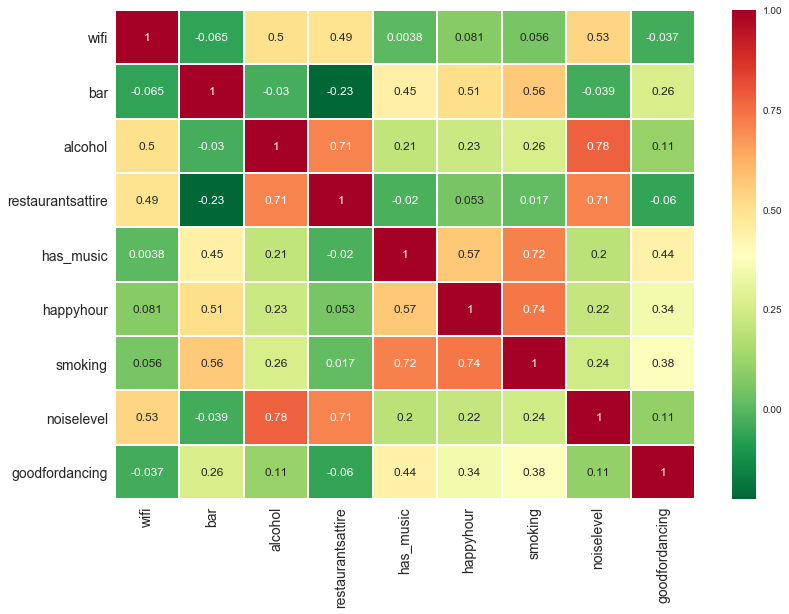

In [730]:
sb.set()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
col_list = ['wifi','bar','alcohol','restaurantsattire','has_music','happyhour','smoking','noiselevel','goodfordancing']
features_for_coeff = resDF.filter(col_list, axis=1)
corr_table = features_for_coeff.corr(method='pearson',min_periods=10)
sb.heatmap(corr_table,cmap='RdYlGn_r', linewidths=1, annot=True,xticklabels=col_list,yticklabels=col_list)
size = plt.gcf()
size.set_size_inches(13,9)
plt.show()

In [697]:
resDF.columns

Index(['lunch', 'restaurantsgoodforgroups', 'drivethru', 'drinks',
       'restaurantspricerange2', 'divey', 'bar', 'hipster',
       'restaurantsdelivery', 'mexico', 'goodfordancing', 'alcohol',
       'happyhour', 'businessacceptscreditcards', 'dinner', 'hastv',
       'goodforkids', 'smoking', 'restaurantsattire', 'noiselevel', 'classy',
       'middleeast', 'res', 'bikeparking', 'brunch', 'outdoorseating',
       'restaurantsreservations', 'latenight', 'wheelchairaccessible', 'italy',
       'dogsallowed', 'restaurantstakeout', 'breakfast', 'trendy',
       'restaurantstableservice', 'dessert', 'byobcorkage', 'caters', 'wifi',
       'casual', 'south_america', 'indian_sub', 'rest_asia', 'china_nearby',
       'rest_europe', 'has_parking', 'has_music', 'canada_america', 'Average'],
      dtype='object')

In [736]:
resFeatDF = pd.read_csv("resFeatureDF 2.csv")

In [738]:
resFeatDF.columns

Index(['Unnamed: 0', 'restaurantscounterservice', 'lunch', 'cuba', 'wednesday',
       'street', 'haiti', 'coloring', 'asian', 'cambodia',
       ...
       'valet', 'poland', 'vietnam', 'caters', 'wifi', 'upscale', 'karaoke',
       'jukebox', 'casual', 'peru'],
      dtype='object', length=130)